# Das Bias-Varianz-Dilemma

Nicht nur die Modellauswahl selbst ist schwierig. Jedes Modell hat selbst noch
Finetuning-Optionen. Die Parameter, die zu einem Modell gehören und nichts mit
den Daten zu tun haben, werden **Hyperparameter** genannt. 


## Lernziele 

```{admonition} Lernziele
:class: hint
* TODO
```

## Was ist das Bias-Varianz-Dilemma?

Im letzten Abschnitt hatten wir künstlich generierte Messdaten. Auswendiglernen
ist kein sinnvolles ML-Modell, probieren wir es mit linearer Regression.

R2-score Trainingsdaten: 0.00


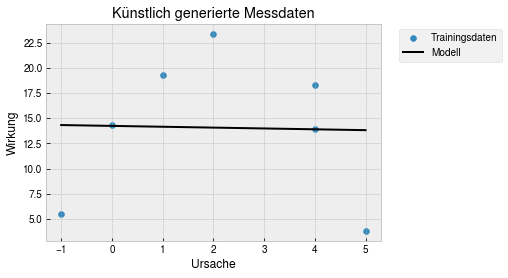

In [8]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# styling of plots
plt.style.use('bmh')
plt.rcParams['font.family'] = ['TeX Gyre Heros', 'sans-serif']

# artificial data: f(x) = −2𝑥^2 + 8𝑥 + 15 + error
X = np.array([-1, 0, 1, 2,  4, 4, 5]).reshape(-1,1)
y = np.array([5.4384, 14.3252, 19.2451, 23.3703, 18.2885, 13.8978, 3.7586])

# preprocessing and training linear regression
model = LinearRegression()
model.fit(X, y)
print('R2-score Trainingsdaten: {:.2f}'.format(model.score(X, y)))

# prediction
X_prediction = np.linspace(-1, 5).reshape(-1,1)
y_prediction = model.predict(X_prediction)

# visualization
fig, ax = plt.subplots()
ax.scatter(X, y, label='Trainingsdaten')
ax.plot(X_prediction, y_prediction, color='k', label='Modell')
ax.set_xlabel('Ursache')
ax.set_ylabel('Wirkung')
ax.set_title('Künstlich generierte Messdaten')
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left');

Schon die Visualisierung zeigt, dass lineare Regression bei diesen Daten keine
gute Idee ist. Der R²-Score ist auch bei 0.

Außer der linearen Modellfunktion gibt es ja noch Polynome höheren Grades, also
quadratische Funktion oder kubische Funktionen. Wenn Sie in der Dokumentation
von Scikit-Learn nun nach einer Funktion zur polynomialen Regression suchen,
werden Sie nicht fündig werden. Tatsächlich brauchen wir auch keine
eigenständige Funktion, sondern können uns mit einem Trick weiterhelfen. Wenn
wir eine quadratische Funktion als Modellfunktion wählen möchten, erzeugen wir
einfach eine zweite Spalte mit Daten $x_i^2$ in den $N$ Zeilen von $i=1, \ldots,
N$. 

Dieser Trick wird auch bei anderen ML-Verfahren angewandt. Aus einem Input, aus
einer Eigenschaft werden jetzt eine neue Eigenschaften erzeugt. Aus einem
eindimensionalen Input wird ein zweidimensionaler Input. Mathematisch gesehen
haben wir die Input-Daten in einen höherdimensionalen Bereich projiziert. Diese
Methode nennt man **Kernel-Trick**. Es ist auch möglich, andere Funktionen zu
benutzen, um die Daten in einen höherdimensionalen Raum zu projizieren, z.B.
radiale Gaußsche Basisfunktionen. Das nennt man dann **Kernel-Methoden**.  

In dieser Vorlesung bleiben wir aber bei den Polynomen als Basisfunktion.
Scikit-Learn stellt auch hier passende Methoden bereit.
 


In [9]:
from sklearn.preprocessing import PolynomialFeatures

print('Original X:\n', X)

# lade die Polynom-Transformator 
polynom_transformator = PolynomialFeatures(degree = 2)

# transformiere X
X_transformiert =  polynom_transformator.fit_transform(X)
print('transformiertes X:\n', X_transformiert)

Original X:
 [[-1]
 [ 0]
 [ 1]
 [ 2]
 [ 4]
 [ 4]
 [ 5]]
transformiertes X:
 [[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]


Damit können wir nun ein lineares Regressionsmodell trainieren, also die
Koeffizienten suchen, so dass $$y_i = \omega_0 + \omega_1 \cdot x_i + \omega_2
\cdot x_i^2 + \varepsilon_i$$ mit möglichst kleinem Fehlern $\varepsilon_i$
gilt.

R2-score Trainingsdaten: 0.94


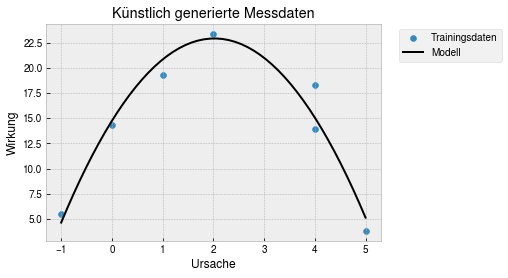

In [12]:
# project data
X2 = PolynomialFeatures(degree = 2).fit_transform(X)

# preprocessing and training linear regression
model = LinearRegression()
model.fit(X2, y)
print('R2-score Trainingsdaten: {:.2f}'.format(model.score(X2, y)))

# prediction
X_prediction = PolynomialFeatures(degree = 2).fit_transform(np.linspace(-1, 5).reshape(-1,1))
y_prediction = model.predict(X_prediction)

# visualization
fig, ax = plt.subplots()
ax.scatter(X2[:,1], y, label='Trainingsdaten')
ax.plot(X_prediction[:,1], y_prediction, color='k', label='Modell')
ax.set_xlabel('Ursache')
ax.set_ylabel('Wirkung')
ax.set_title('Künstlich generierte Messdaten')
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left');

Wäre eine kubische Modellfunktion noch besser?

R2-score Trainingsdaten: 0.97


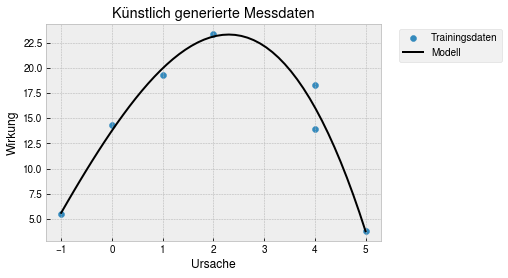

In [13]:
# project data
X3 = PolynomialFeatures(degree = 3).fit_transform(X)

# preprocessing and training linear regression
model = LinearRegression()
model.fit(X3, y)
print('R2-score Trainingsdaten: {:.2f}'.format(model.score(X3, y)))

# prediction
X_prediction = PolynomialFeatures(degree = 3).fit_transform(np.linspace(-1, 5).reshape(-1,1))
y_prediction = model.predict(X_prediction)

# visualization
fig, ax = plt.subplots()
ax.scatter(X3[:,1], y, label='Trainingsdaten')
ax.plot(X_prediction[:,1], y_prediction, color='k', label='Modell')
ax.set_xlabel('Ursache')
ax.set_ylabel('Wirkung')
ax.set_title('Künstlich generierte Messdaten')
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left');

Könnte sein. Und vielleicht ein Polynom 4. Grades noch besser? Wir gehen einfach
mal bis Grad 10 durch.

R2-score für Grad 1: 0.0007
R2-score für Grad 2: 0.9450
R2-score für Grad 3: 0.9662
R2-score für Grad 4: 0.9664
R2-score für Grad 5: 0.9691
R2-score für Grad 6: 0.9691
R2-score für Grad 7: 0.9691


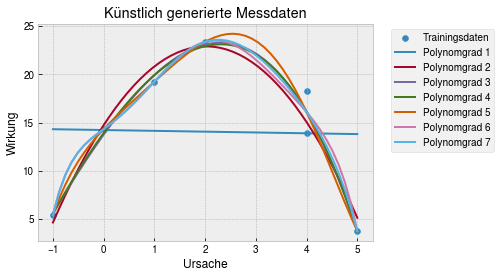

In [25]:

model = LinearRegression()

# visualization
fig, ax = plt.subplots()
ax.scatter(X, y, label='Trainingsdaten')
ax.set_xlabel('Ursache')
ax.set_ylabel('Wirkung')
ax.set_title('Künstlich generierte Messdaten')

for d in range(1,8):
    X_transformiert = PolynomialFeatures(degree = d).fit_transform(X)
    model.fit(X_transformiert, y)
    print('R2-score für Grad {0}: {1:.4f}'.format(d, model.score(X_transformiert, y)))

    # prediction
    X_prediction = PolynomialFeatures(degree = d).fit_transform(np.linspace(-1, 5).reshape(-1,1))
    y_prediction = model.predict(X_prediction)

    label_string = 'Polynomgrad {}'.format(d)
    ax.plot(X_prediction[:,1], y_prediction, label=label_string)
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left');



Bis Grad 7 sieht es noch relativ gut aus, auch wenn scheinbar keine Verbesserung
des R²-Scores mehr erzielt werden kann. Auch scheint das Polynom mit Grad 7
etwas schwankend. Schauen wir uns Grad 8 an:

R2-score für Grad 8: 0.9691


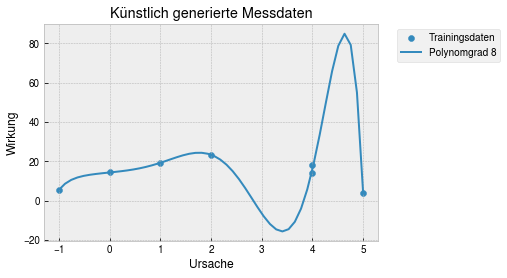

In [30]:
# visualization
fig, ax = plt.subplots()
ax.scatter(X, y, label='Trainingsdaten')
ax.set_xlabel('Ursache')
ax.set_ylabel('Wirkung')
ax.set_title('Künstlich generierte Messdaten')

d = 8
X_transformiert = PolynomialFeatures(degree = d).fit_transform(X)
model.fit(X_transformiert, y)
print('R2-score für Grad {0}: {1:.4f}'.format(d, model.score(X_transformiert, y)))

# prediction
X_prediction = PolynomialFeatures(degree = d).fit_transform(np.linspace(-1, 5).reshape(-1,1))
y_prediction = model.predict(X_prediction)

label_string = 'Polynomgrad {}'.format(d)
ax.plot(X_prediction[:,1], y_prediction, label=label_string)
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left');

Für Grad 10 wird es noch schlimmer:



R2-score für Grad 10: 0.9691


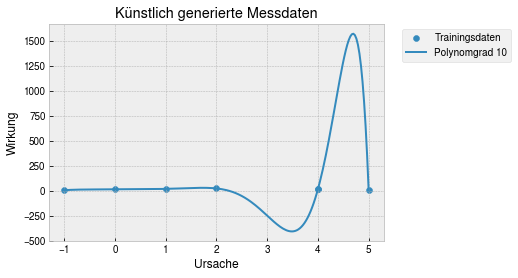

In [32]:
# visualization
fig, ax = plt.subplots()
ax.scatter(X, y, label='Trainingsdaten')
ax.set_xlabel('Ursache')
ax.set_ylabel('Wirkung')
ax.set_title('Künstlich generierte Messdaten')

d = 10
X_transformiert = PolynomialFeatures(degree = d).fit_transform(X)
model.fit(X_transformiert, y)
print('R2-score für Grad {0}: {1:.4f}'.format(d, model.score(X_transformiert, y)))

# prediction
X_prediction = PolynomialFeatures(degree = d).fit_transform(np.linspace(-1, 5, 200).reshape(-1,1))
y_prediction = model.predict(X_prediction)

label_string = 'Polynomgrad {}'.format(d)
ax.plot(X_prediction[:,1], y_prediction, label=label_string)
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left');

Das Regression mit Polynomen unerschiedlichen Grades verdeutlicht das sogenannte
**Bias-Varianz-Dilemma**. Das lineare Regressionsmodell hat zwei Parameter,
Steigung und y-Achsenabschnitt. Scheinbar sind das zuwenige Modellparameter, um
die Messdaten gut zu erklären und prognostizieren. Wir haben einen großen Bias
vorliegen, eine Unteranpassung an die Daten. Dazu ist auch das englische Wort
**Underfitting** sehr gebräuchlich.

Bei dem Polynom mit Grad 10 haben wir 11 Modellparameter. Offensichtlich sind
das zuviele Parameter (es liegen ja nur sieben Messwerte vor). Die Varianz ist
zu groß, die Modellfunktion schwankt insbesondere im Intervall [4,5] viel zu
stark. Das nennen wir Überanpassung oder **Overfitting**. 

Bei der Modellwahl stehen wir stets vor dem Dilemma, ein Modell mit zu wenigen
Parametern oder eines mit zuvielen zu wählen. 